#  Определение класса аварийности транспортного средства

По данным телеметрического мониторинга состояния карьерных самосвалов, полученных на предприятиях Coal Inc. в ноябре 2019 года необходимо построить модель определения класса аварийности транспортного средства.

**Описание данных:**

Таблица data:  
- *temperature* — cредняя температура воздуха за бортом;
- *velocity* — cредняя скорость движения самосвала;
- *pressure* — cреднее давление в шинах;
- *incline* — cреднее значение показаний инклинометра;
- *class* — класс аварийности

Предложенный массив данных содержит 135 записей с описанными выше измерениями и классом аварийности самосвала, присвоенным ему ремонтной бригадой.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import math

In [2]:
data=pd.read_csv('./data/data.csv')

In [3]:
data.head()

,temperature,velocity,pressure,incline,class
0,5.1,3.5,1.4,0.2,Class_1
1,4.9,3.0,1.4,0.2,Class_1
2,4.7,3.2,1.3,0.2,Class_1
3,4.6,3.1,1.5,0.2,Class_1
4,5.0,3.6,1.4,0.2,Class_1


Многие алгоритмы машинного обучения требуют на вход численные признаки, поэтому приведем метку класса к целочисленному типу.

In [4]:
data.loc[:,'class']=data['class'].map({'Class_1': 1, 'Class_2': 2, 'Class_3': 3})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
temperature    134 non-null float64
velocity       134 non-null float64
pressure       134 non-null float64
incline        134 non-null float64
class          134 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.3 KB


## Шаг 1. Статистический анализ

Посмотрим на распределение имеющихся данных по классам. 

In [6]:
data['class'].value_counts()

3    45
1    45
2    44
Name: class, dtype: int64

Распределение практически равномерное.

Обратимся к совместному распределению классов.

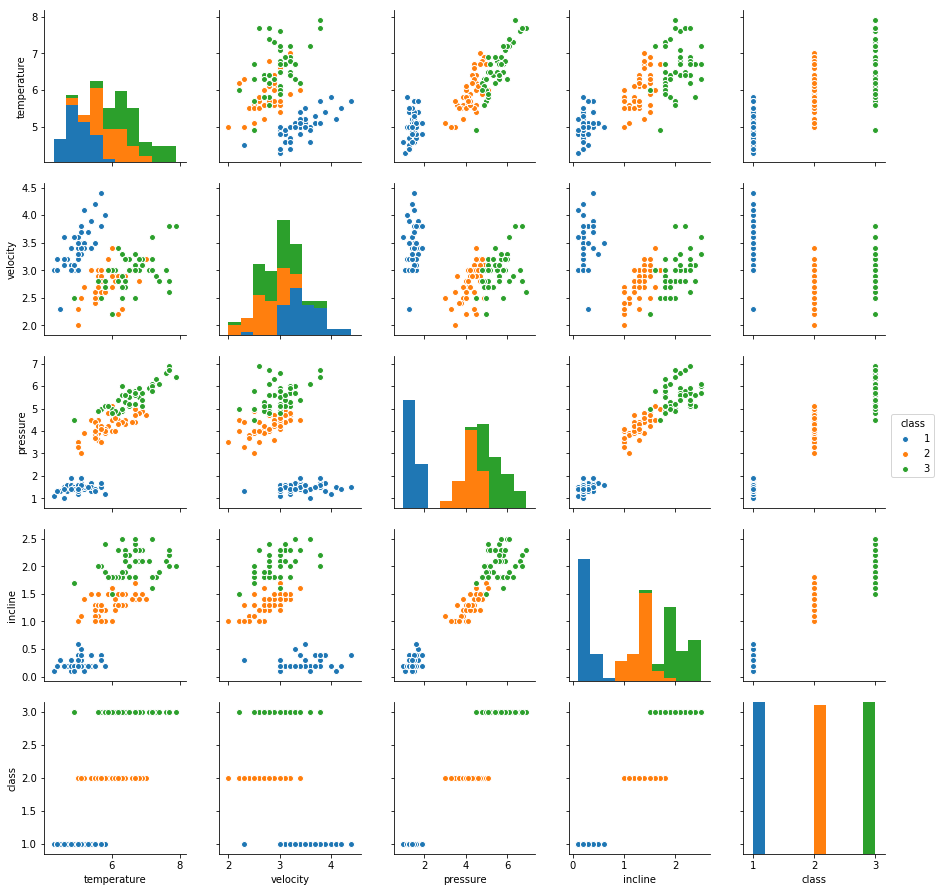

In [7]:
sns.pairplot(data, hue ='class')

Построим матрицу корреляции, показывающую линейный коэффициент корреляции между всеми возможными парами переменных.

In [8]:
data.corr()

,temperature,velocity,pressure,incline,class
temperature,1.000000,-0.125808,0.872487,0.813873,0.783336
velocity,-0.125808,1.000000,-0.437006,-0.381367,-0.436146
pressure,0.872487,-0.437006,1.000000,0.963831,0.948509
incline,0.813873,-0.381367,0.963831,1.000000,0.961449
class,0.783336,-0.436146,0.948509,0.961449,1.000000


Построим так же сводную таблицу средних значений телеметрических показателей для каждого класса аварийности. 

In [9]:
data.pivot_table(index='class', aggfunc='mean')

,incline,pressure,temperature,velocity
class,,,,
1,0.251111,1.462222,5.022222,3.442222
2,1.325000,4.256818,5.938636,2.772727
3,2.042222,5.548889,6.591111,2.973333


## Вывод

Сильная линейная зависимость (с коэффициентром корреляции 0.96) наблюдается классом давлением в шинах и показаниями инклинометра. При превышении наклоном определенного придела давление в шинах значительно повышается. Можно так же заметить, все самосвалы, относящиеся к 1 классу аварийности имели дваление в шинах в пределе 1-2 атм (соответственно работая на в основном в несложных условиях небольших наклонов). Можно сделать вывод, что большая часть аварий, приходится на самосвалы, работающие в более тяжелых условиях. Средний показатель давления в шинах для самосвала отнесенного ко второму классу аварийности - 4.26, для самосвала третьего класса - 5.55. Это хороший показатель для предсказания итогового класса аварийности. С ростом наклона (и соответвующего ему давления в шинах) повышается и класс аварийности. 

Некоторая линейная зависимость (с коэффициентром корреляции 0.78) наблюдается между классом аварийности и температурой окружающего воздуха. Чем выше температура, тем выше класс аварийности, однако этот показатель не такой силен, при одинаковой температуре встречаются самосвалы всех трех классов аварийности. Ко всему прочему температура - параметр который практически невозможно контролировать. Несмотря на это она может помочь предсказать класс аварийности.

Зависимость класса опасности от скорости нелинейна. Однако можно заметить, что самосвалы 1 класса как правило имеют большую среднюю скорость (равную 3.44). Как было выяснено ранее, это может быть связано с тем, что самосвалы 1 класса работают в более легких условиях небольшого наклона и способны достичь более высокой скорости в принципе. Однако при сложных условиях наблюдается зависимость между скоростью и аварийностью. Самосвалы 3 класса двигались со средней скоростью 3, что выше среднего показателя скорости у самосвалов второго класса (составляющей 2.8). В данном случае более высокая скорость коррелирует с повышением класса аварийности. 

**Практические решения:** Наиболее сильно аварийность самосвалов повышается при работе в тяжелых условиях, характеризующихся высокими показаниями инклинометра, ведущими к повышенному давлению в шинах. Для понижения общего уровня аварийности следует своевременно выполненять вертикальную планировку промплощадки, облегчая тем самым условия для ведения работ. В реальных условиях угольного разреза, изобилующего съездами и имеющего высокие темпы ведения горных работ, зачастую невозможно значительно улучшить производственные условия. В этом случае рекомендуется ограничить допустимую скорость движения самосвалов при работе в тяжелых условиях. Это поможет уменьшить число самосвалов, отнесенных к 3 классу аварийности.   
Так же некоторое улучшение может наступить, если проводить ротацию техники, работающую в различных условиях. Это позволит распределить загруженность ремонтных бригад по времени. 


___

## Шаг 2. Построение аналитических моделей. 

Исходные данные содержат небольшое число записей, каждая из которых состоит из 4 численных параметров и 1 метки класса. Классы хорошо различимы даже визуально (например, хорошо видно, что к 1 классу относятся только машины, уровень давления в шинах которых не превышает 2 атм). Для таких данных хорошо подходят простые алгоритмы классификации, вроде k - ближайшах соседей или деревья решений. 

В работе использована библиотека scikit-learn.

Для выполнения контроля за переобучением разобъем имеющийся датасет на тренировочную и тестовую часть. 

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV

Разделим датасет на две части X, содержащий телеметрические показатели и y, содержащий метки классов. 

In [11]:
X = data.iloc[:, 0:4].values
y = data.iloc[:, 4].values

Случайным образом разделим данные на тренировочную и тестовую часть. Размер тестовой части ввиду небольного количества исходных данных примем равным 20% от общего размера датасета.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Первый исползуемый алгоритм - используемый алгоритм классификации - решающее дерево.  

Оно предоставляет наглядные и легко интерпретируемые человеком результаты. 

In [13]:
from sklearn.tree import DecisionTreeClassifier

Произведем настройку параметров дерева. Максимальная глубина и минимальное число элементов в листе настраивается на 5-кратной кросс-валидации.

In [14]:
tree_params = {'max_depth': list(range(1, 5)), 
               'min_samples_leaf': list(range(1, 5))}

In [15]:
tree_new = DecisionTreeClassifier(max_depth=5, random_state=42)

In [16]:
tree_grid = GridSearchCV(tree_new, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [17]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_sam

In [18]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 2, 'min_samples_leaf': 1}, 0.9532467532467532)

Выбраны самые оптимальные параметры решающего дерева - максимальная глубина - 2, минимальное число элементов в листе - 1

Выполним отрисовку дерева для наглядного представления полученного классификатора

In [19]:
from sklearn import tree

In [20]:
tree_new = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1, random_state=42)

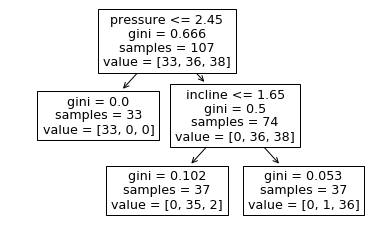

In [21]:
tree.plot_tree(tree_new.fit(X_train, y_train), 
               feature_names = ('temperature', 'velocity', 'pressure', 'incline', 'class'));

Видно, что модель относит к первому классу аварийности те записи, телеметрия которых показывает значение давления меньше или равное 2,45. Из оставшихся записей, если показатель инклинометра меньше или равен 1,65 - запись относится ко второму классу аварийности, если выше - к третьему. 

Проверим полученную модель на имеющихся тестовых данных.

In [22]:
tree_grid_pred = tree_grid.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
confusion_matrix(y_test, tree_grid_pred)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  7]], dtype=int64)

In [25]:
accuracy_score(y_test, tree_grid_pred)

0.9629629629629629

Как видно, даже такая модель предоставляет крайне высокую процент верного определения класса, что значит что её целесообразно использовать для определения класса аварийности по телеметрическим показателям.

___

Выполним так же построение простой нейронной сети с помощью библиотеки машинного обучения PyTorch.  

В данном случае использование нейронной сети является избыточным, ведь, как мы видели, эту задачу можно решить гораздо более простыми методами. Ко всему прочему нейронные сети функционируют по принципу черного ящика, и неприминимы в случаях, когда необходимо объяснить причину принятия решения. 

Однако в целом нейросети имеют множество преимуществ перед остальными методами (например устойчивость к шумам, адаптивность, высокое быстроействие и отказоустойчивость), поэтому спектр задач, в которых их применение оправдано достаточно широк.

In [26]:
import torch
from torch import nn
from sklearn.preprocessing import StandardScaler

Отмасштабируем данные и приведем их к виду, применимому в нейросетевой модели 

In [27]:
scaler = StandardScaler()
X_nn = scaler.fit_transform(X_train)
X_nn_test = scaler.fit_transform(X_test)

In [28]:
X_nn = torch.autograd.Variable(torch.FloatTensor(X_train))
y_nn = torch.autograd.Variable(torch.LongTensor(y_train.astype(np.int64))) - 1

In [29]:
X_nn_test = torch.autograd.Variable(torch.FloatTensor(X_test))
y_nn_test = torch.autograd.Variable(torch.LongTensor(y_test.astype(np.int64))) - 1

Зададим параметры математической модели. Сеть состоит из одного входного, двух скрытых  (в каждом по 50 нейронов) и одного выходного слоя. После каждого линейного слоя выполняется дропаут (это необходимо для избежания переобучения). Функция активации для каждого линейного слоя - ReLU.  
Функция потерь - CrossEntropyLoss, наиболее часто применяемая для задач многоклассовой классификации.  
Оптимизатор - Adam.

In [30]:
torch.manual_seed(42) 
np.random.seed(42)
D_in, H1, H2, D_out = 4, 50, 50, 3
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.Dropout(),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, H2),
    torch.nn.Dropout(),
    torch.nn.ReLU(),
    torch.nn.Linear(H2, D_out),
)
    
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Определим функцию обучениия. 

In [31]:
def train(num_epoch):
    train_losses = []
    for i in range(num_epoch):
        model.train(True)
        y_pred = model(X_nn)
        loss = loss_fn(y_pred, y_nn)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    return train_losses

Обучим модель на обучающей выборке. Выведем при этом значение функции потерь.

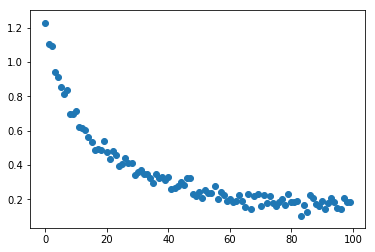

In [32]:
train_losses = train(100)
plt.scatter(range(len(train_losses)), train_losses)

In [33]:
model.train(False)

Sequential(
  (0): Linear(in_features=4, out_features=50, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=50, out_features=50, bias=True)
  (4): Dropout(p=0.5, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=50, out_features=3, bias=True)
)

Выполним предсказания на тестовых данных. 

In [34]:
y_pred = model(X_nn_test)

Модель выдает вероятность принадлежности объекта к каждому классу. Получим класс с наибольшей вероятностью для каждого объекта. 

In [35]:
_, index = torch.max(y_pred,1)

In [36]:
accuracy_score(y_nn_test, index)

1.0

Как видно процент верно предсказаных значений на тестовых данных превышает такой процент для решающего дерева (и равен 100%). Это хорошо характеризует полученную модель. 

Код для проверки на внешних тестовых данных. Необходимо поместить csv файл с данными с названием 'test.csv' в папку и запустить ячейки.

In [ ]:
test=pd.read_csv('./data/test.csv')

In [ ]:
test.loc[:,'class']=test['class'].map({'Class_1': 1, 'Class_2': 2, 'Class_3': 3})

In [ ]:
X_val = data.iloc[:, 0:4].values
y_val = data.iloc[:, 4].values

- Проверка дерева 

In [ ]:
tree_test_pred = tree_grid.predict(X_val)

In [ ]:
accuracy_score(y_val, tree_test_pred)

- Проверка нейросети.

In [ ]:
X_nn_val = scaler.fit_transform(X_val)

In [ ]:
X_nn_val = torch.autograd.Variable(torch.FloatTensor(X_nn_val))
y_nn_val = torch.autograd.Variable(torch.LongTensor(y_val.astype(np.int64))) - 1

In [ ]:
y_val_pred = model(X_nn_val)

In [ ]:
_, index = torch.max(y_pred,1)

In [ ]:
accuracy_score(y_nn_test, index)